# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la gi
Processing Record 2 of Set 1 | puerto santander
Processing Record 3 of Set 1 | tazovsky
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | ketchikan
Processing Record 6 of Set 1 | saveh
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | akureyri
Processing Record 11 of Set 1 | bandon
Processing Record 12 of Set 1 | calama
Processing Record 13 of Set 1 | las vegas, santa barbara
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | lerwick
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | hitha

Processing Record 39 of Set 4 | yangor
City not found. Skipping...
Processing Record 40 of Set 4 | yanam
Processing Record 41 of Set 4 | khamis mushait
Processing Record 42 of Set 4 | abu jibeha
Processing Record 43 of Set 4 | kataragama
City not found. Skipping...
Processing Record 44 of Set 4 | scottburgh
Processing Record 45 of Set 4 | nova vicosa
Processing Record 46 of Set 4 | thisted
Processing Record 47 of Set 4 | ambon
Processing Record 48 of Set 4 | derzhavinsk
Processing Record 49 of Set 4 | rabo de peixe
Processing Record 0 of Set 5 | baie-comeau
Processing Record 1 of Set 5 | kaset wisai
Processing Record 2 of Set 5 | nadi
Processing Record 3 of Set 5 | anar darah
Processing Record 4 of Set 5 | isafjordur
Processing Record 5 of Set 5 | island harbour
Processing Record 6 of Set 5 | ust-nera
Processing Record 7 of Set 5 | tanrake village
City not found. Skipping...
Processing Record 8 of Set 5 | puerto natales
Processing Record 9 of Set 5 | nema
Processing Record 10 of Set 5 

Processing Record 31 of Set 8 | lichinga
Processing Record 32 of Set 8 | bay harbor
Processing Record 33 of Set 8 | lazaro cardenas
Processing Record 34 of Set 8 | palmerston north
Processing Record 35 of Set 8 | dame-marie
Processing Record 36 of Set 8 | abqaiq
Processing Record 37 of Set 8 | lae
Processing Record 38 of Set 8 | hampton bays
Processing Record 39 of Set 8 | kudahuvadhoo
Processing Record 40 of Set 8 | chernyakhovsk
Processing Record 41 of Set 8 | xunchang
Processing Record 42 of Set 8 | north bend
Processing Record 43 of Set 8 | bamboo flat
Processing Record 44 of Set 8 | imbituba
Processing Record 45 of Set 8 | tromso
Processing Record 46 of Set 8 | kavieng
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | san patricio
Processing Record 49 of Set 8 | al jawf
Processing Record 0 of Set 9 | katsuren-haebaru
Processing Record 1 of Set 9 | smithers
Processing Record 2 of Set 9 | vila franca do campo
Processing Record 3 of Set 9 | greymouth
Processing Re

Processing Record 18 of Set 12 | palia kalan
Processing Record 19 of Set 12 | jashpurnagar
Processing Record 20 of Set 12 | vikulovo
Processing Record 21 of Set 12 | lethem
Processing Record 22 of Set 12 | shibirghan
Processing Record 23 of Set 12 | dalnegorsk
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | ahau
City not found. Skipping...
Processing Record 26 of Set 12 | rio branco
Processing Record 27 of Set 12 | ar rass
Processing Record 28 of Set 12 | de queen
Processing Record 29 of Set 12 | galveston
Processing Record 30 of Set 12 | varash
City not found. Skipping...
Processing Record 31 of Set 12 | konnur
Processing Record 32 of Set 12 | ryde
Processing Record 33 of Set 12 | tsetserleg
Processing Record 34 of Set 12 | mata-utu
Processing Record 35 of Set 12 | pirdop
Processing Record 36 of Set 12 | leshan
Processing Record 37 of Set 12 | rovaniemi
Processing Record 38 of Set 12 | nuku'alofa
Processing Record 39 of Set 12 | aleksandrovsk-sakhalinskiy
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,la gi,10.6667,107.7833,26.53,83,99,1.18,VN,1683671612
1,puerto santander,8.3636,-72.4063,32.67,66,100,0.33,CO,1683671612
2,tazovsky,67.4667,78.7000,-10.04,95,100,4.69,RU,1683671478
3,ushuaia,-54.8000,-68.3000,2.81,65,20,2.06,AR,1683671493
4,ketchikan,55.3422,-131.6461,17.26,36,0,5.14,US,1683671613


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la gi,10.6667,107.7833,26.53,83,99,1.18,VN,1683671612
1,puerto santander,8.3636,-72.4063,32.67,66,100,0.33,CO,1683671612
2,tazovsky,67.4667,78.7000,-10.04,95,100,4.69,RU,1683671478
3,ushuaia,-54.8000,-68.3000,2.81,65,20,2.06,AR,1683671493
4,ketchikan,55.3422,-131.6461,17.26,36,0,5.14,US,1683671613


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

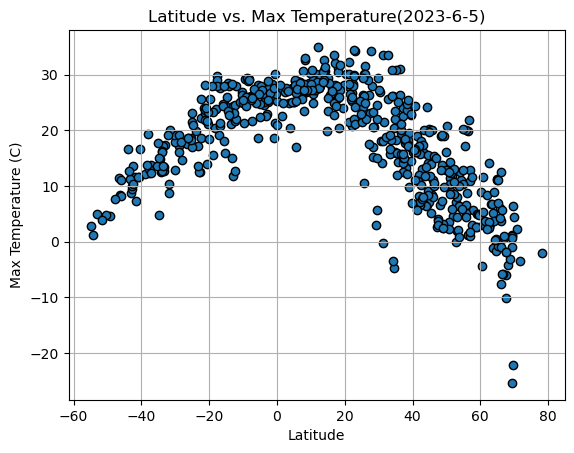

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis,edgecolor = 'black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude vs. Max Temperature(2023-6-5)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

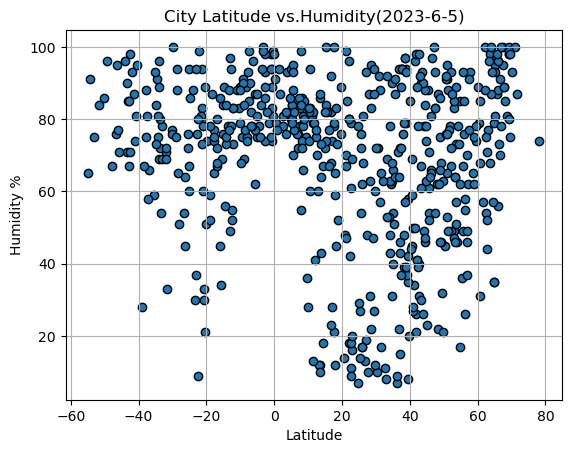

In [11]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis1 = city_data_df['Humidity']
plt.scatter(x_axis, y_axis1 ,edgecolor = 'black')
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.title('City Latitude vs.Humidity(2023-6-5)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

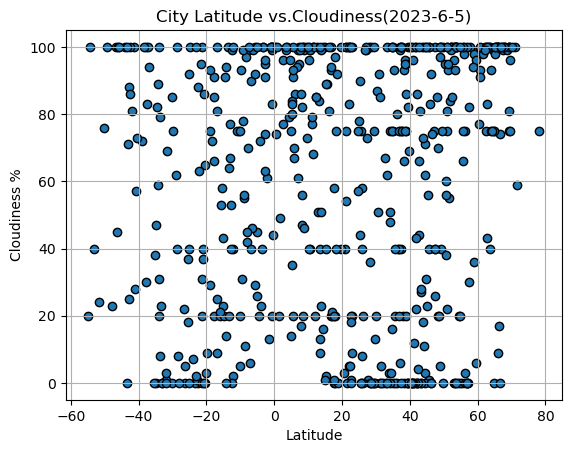

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis2 = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis2 ,edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.title('City Latitude vs.Cloudiness(2023-6-5)')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

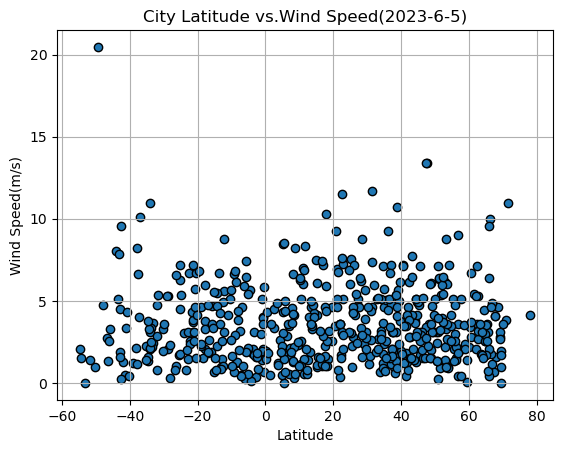

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis3 = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis3 ,edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid()
plt.title('City Latitude vs.Wind Speed(2023-6-5)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots



def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,la gi,10.6667,107.7833,26.53,83,99,1.18,VN,1683671612
1,puerto santander,8.3636,-72.4063,32.67,66,100,0.33,CO,1683671612
2,tazovsky,67.4667,78.7000,-10.04,95,100,4.69,RU,1683671478
4,ketchikan,55.3422,-131.6461,17.26,36,0,5.14,US,1683671613
5,saveh,35.0213,50.3566,18.29,54,100,2.35,IR,1683671613


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,2.81,65,20,2.06,AR,1683671493
6,puerto ayora,-0.7393,-90.3518,27.98,94,83,4.02,EC,1683671491
8,flying fish cove,-10.4217,105.6791,26.82,83,75,5.14,CX,1683671613
11,calama,-22.4667,-68.9333,22.27,9,0,6.69,CL,1683671614
16,blackmans bay,-43.0167,147.3167,8.74,85,71,4.51,AU,1683671620


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6984343805282511


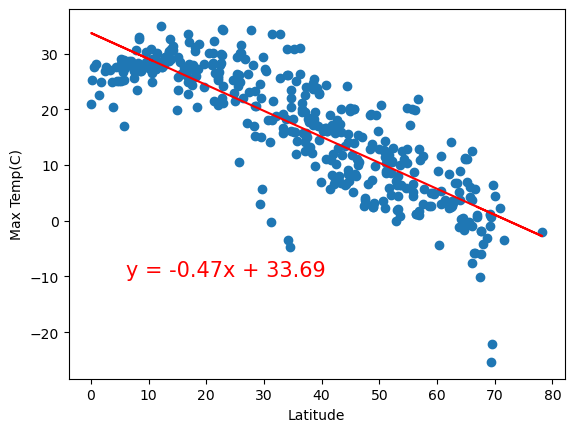

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp(C)",(6,-10))


The r-value is: 0.7231315420842538


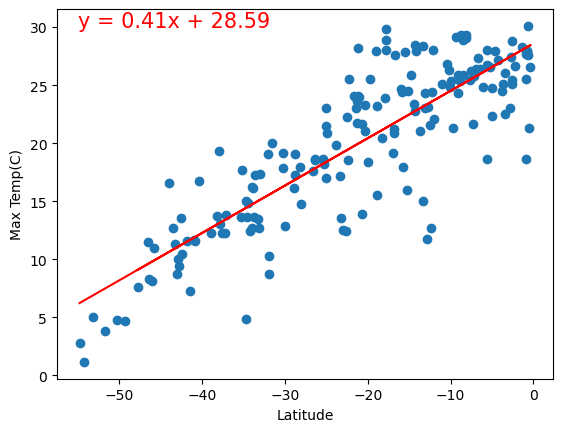

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp(C)",(-55,30))


# **Discussion about the linear relationship:**
The r squared value in first image above is 0.69, which is high and we can see all the datapoints closer to the regression line, so we can conclude that there is a negative correlation between Max temp(dependent varaible) and Latitude( independent variable). The Max temp decreases as latittude increases in the northern hemisphere.
                                          The r squared value in the second image is 0.72, which is also high and we can say that there is a positive realtionship between Max Temp. and Latitude in the southern hemisphere. In the southern hemisphere the Max Temp. increases when the latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0065352585972298345


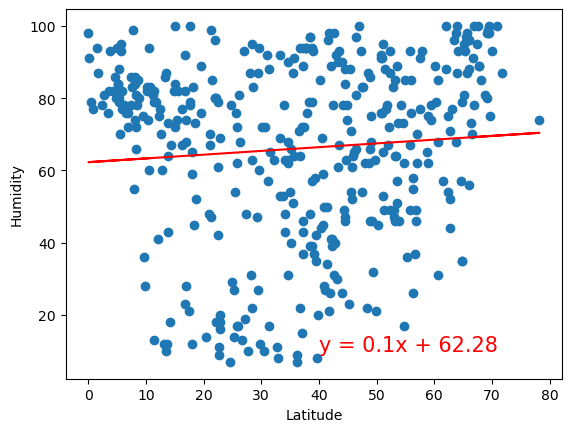

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))


The r-value is: 0.01278479398259696


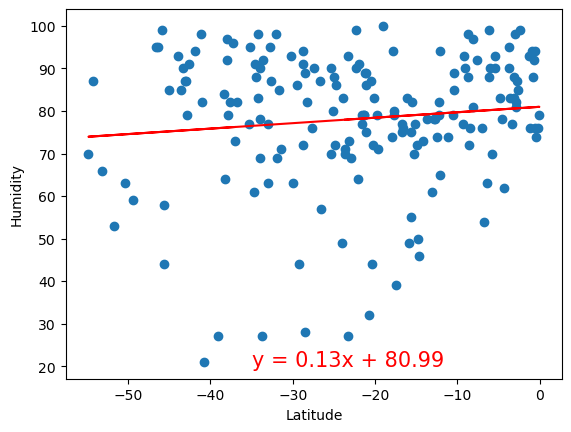

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-35,20))


**Discussion about the linear relationship:** 
The above two plots show that the data points are quite farther away from the regression lines. This is also evident by the low r squared values in both cases. We can conclude that there is no or very little correlation between latitude and Humidity in both northen sphere and southern sphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004352882198742668


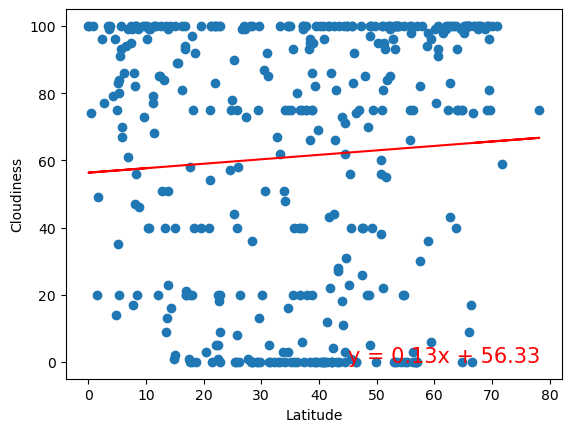

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(45,0))


The r-value is: 0.0038612796703611316


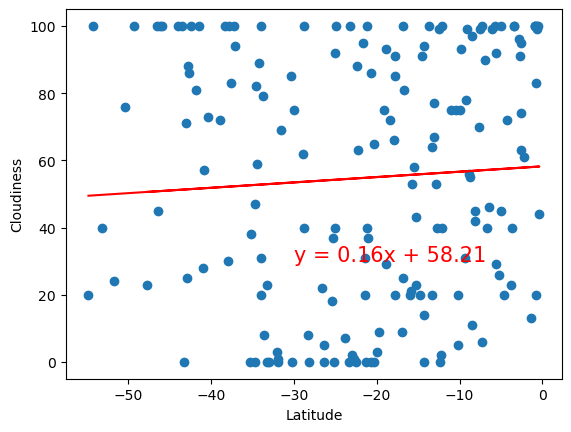

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-30,30))


**Discussion about the linear relationship:** If we look at both the plots above, we can see that the data points are farther away from the regression line and the r squared values are 0.004 and 0.003 respectively for northern and southern hemispheres. These are very low r squared values and we can conclude that there is no correlation between Cloudiness and Latitude in both the northern hemisphere and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 9.524329022845407e-07


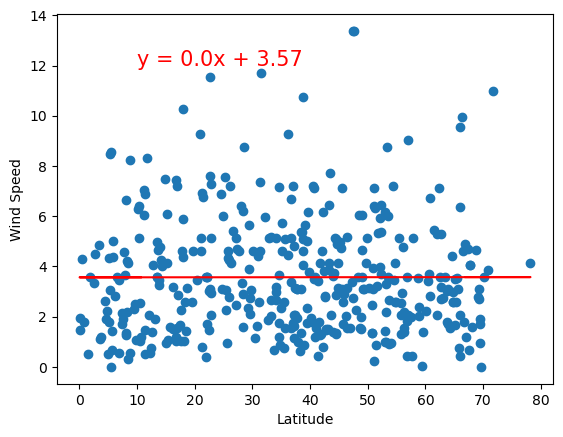

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(10,12))


The r-value is: 0.011618559980351576


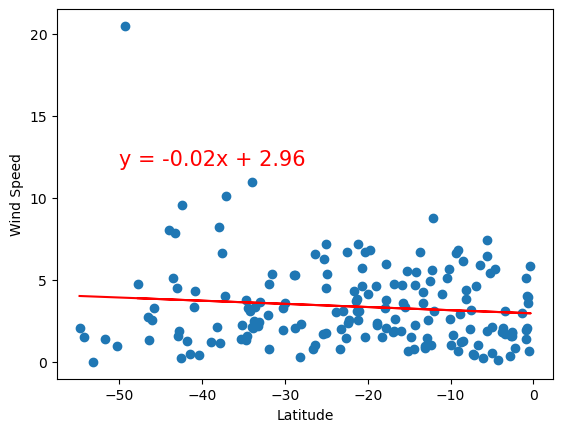

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-50,12))


**Discussion about the linear relationship:** If we look at the two plots above, we can see that the regression lines are almost parallel to the x axis. The r squared value for northern hemisphere is very low(9.524329022845407e-07) and for southern hemisphere it's 0.01. We can say that there is no correaltion between Wind Speed and Latitude in both northern and southern hemispheres.